
# ENGLISH R1A: Chinatown and the Culture of Exclusion
**Instructor: Amy Lee**

**Developers: Michaela Palmer, Maya Shen, Cynthia Leu, Chris Cheung**

**FPF 2017**

Welcome to lab! Please read this lab in its entirety, as the analysis will make a lot more sense with the background context provided.
This lab is intended to be a hands-on introduction to data science as it can be applied to Chinatown demographics and analyzing primary texts.

We will be reading and analyzing representations of Chinatown in the form of data and maps. In addition, we will learn how data tools can be used to read and analyze large volumes of text.

## What this lab will cover
* Running Jupyter Notebooks
* Data Analysis of Chinatowns' demographics
* Visualization & Interpretation
* Using Data Tools to Analyze Primary Texts

## What you need to do
* Read the content, complete the questions
* Analyze the data
* Submit the assignment


# 1. Running Jupyter Notebooks

You are currently working in a Jupyter Notebook. A Notebook allows text and code to be combined into one document. Each rectangular section of a notebook is called a "cell." There are two types of cells in this notebook: text cells and code cells. 

Jupyter allows you to run simulations and regressions in real time. To do this, select a code cell, and click the "run cell" button at the top that looks like ▶| to confirm any changes. Alternatively, you can hold down the `shift` key and then press `return` or `enter`.

In the following simulations, anytime you see `In [ ]` you should click the "run cell" button to see output. **If you get an error message after running a cell, go back to the beginning of the lab and make sure that every previous code cell has been run.**


# Part 0: Introduction to Python and Jupyter Notebooks: <a id='jupyter'></a>

## 1. Cells, Arithmetic, and Code
In a notebook, each rectangle containing text or code is called a *cell*.

Cells (like this one) can be edited by double-clicking on them. This cell is a text cell, written in a simple format called [Markdown](http://daringfireball.net/projects/markdown/syntax) to add formatting and section headings.  You don't need to worry about Markdown today, but it's a pretty fun+easy tool to learn.

After you edit a cell, click the "run cell" button at the top that looks like ▶| to confirm any changes. (Try not to delete the instructions.) You can also press `SHIFT-ENTER` to run any cell or progress from one cell to the next.

Other cells contain code in the Python programming language.  Running a code cell will execute all of the code it contains.

Try running this cell:

In [177]:
print("Hello, World!")

Hello, World!


We will now quickly go through some very basic functionality of Python, which we'll be using throughout the rest of this notebook.

### 1.1 Arithmetic
Quantitative information arises everywhere in data science. In addition to representing commands to `print` out lines, expressions can represent numbers and methods of combining numbers. 

The expression `3.2500` evaluates to the number 3.25. (Run the cell and see.)

In [178]:
3.2500

3.25

We don't necessarily always need to say "`print`", because Jupyter always prints the last line in a code cell. If you want to print more than one line, though, do specify "`print`".

In [179]:
print(3)
4
5

3


5

Many basic arithmetic operations are built in to Python, like `*` (multiplication), `+` (addition), `-` (subtraction), and `/` (division). There are many others, which you can find information about [here](http://www.inferentialthinking.com/chapters/03/1/expressions.html). Use parentheses to specify the order of operations, which act according to PEMDAS, just as you may have learned in school. Use parentheses for a happy new year!

In [180]:
2 + (6 * 5 - (6 * 3)) ** 2 * (( 2 ** 3 ) / 4 * 7)

2018.0

### 1.2 Variables

We sometimes want to work with the result of some computation more than once. To be able to do that without repeating code everywhere we want to use it, we can store it in a variable with *assignment statements*, which have the variable name on the left, an equals sign, and the expression to be evaluated and stored on the right. In the cell below, `(3 * 11 + 5) / 2 - 9` evaluates to 10, and gets stored in the variable `result`.

In [181]:
result = (3 * 11 + 5) / 2 - 9

In [182]:
result 

10.0

## 2. Functions

One important form of an expression is the call expression, which first names a function and then describes its arguments. The function returns some value, based on its arguments. Some important mathematical functions are:

| Function | Description                                                   |
|----------|---------------------------------------------------------------|
| `abs`      | Returns the absolute value of its argument                    |
| `max`      | Returns the maximum of all its arguments                      |
| `min`      | Returns the minimum of all its arguments                      |
| `round`    | Round its argument to the nearest integer                     |

Here are two call expressions that both evaluate to 3

```python
abs(2 - 5)
max(round(2.8), min(pow(2, 10), -1 * pow(2, 10)))
```

These function calls first evaluate the expressions in the arguments (inside the parentheses), then evaluate the function on the results. `abs(2-5)` evaluates first to `abs(3)`, then returns `3`.

A **statement** is a whole line of code.  Some statements are just expressions, like the examples above, that can be broken down into its subexpressions which get evaluated individually before evaluating the statement as a whole.


### 2.1 Calling functions

The most common way to combine or manipulate values in Python is by calling functions. Python comes with many built-in functions that perform common operations.

For example, the `abs` function takes a single number as its argument and returns the absolute value of that number.  The absolute value of a number is its distance from 0 on the number line, so `abs(5)` is 5 and `abs(-5)` is also 5.

In [183]:
abs(5)

5

In [184]:
abs(-5)

5

Functions can be called as above, putting the argument in parentheses at the end, or by using "dot notation", and calling the function after finding the arguments, as in the cell immediately below.

In [185]:
from datascience import make_array
nums = make_array(1, 2, 3)  # makes a list of items, in this case, numbers

In [186]:
nums.mean()  # finds the average of the array

2.0

# 1: Exploring Demographic Data: <a id='jupyter'></a>

## 1.1 Importing Modules

First, we need to import libraries so that we are able to call the functions from within. We are going to use these functions to manipulate data tables and conduct a statistical analysis. Run the code cell below to import these modules.

In [187]:
%%capture
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
%matplotlib inline
import folium
import pandas as pd
from IPython.display import HTML, display, IFrame
import folium
import spacy
from wordcloud import WordCloud
from textblob import TextBlob
import geojson

### Official map of Chinatown in San Francisco - 1855
#### Prepared under the supervision of the special committee of the Board of Supervisors. July 1885.

![image](data/PJM_1093_01.jpg)


This map reflects the pervasive bias against the Chinese in California and in turn further fostered the hysteria. It was published as part of an official report of a Special Committee established by the San Francisco Board of Supervisors "on the Condition of the Chinese Quarter." The Report resulted from a dramatic increase in hostility to the Chinese, particularly because many Chinese laborers had been driven out of other Western states by vigilantes and sought safety in San Francisco (Shah 2001, 37).

The substance and tone of the Report is best illustrated by a few excerpts: "The general aspect of the streets and habitations was filthy in the extreme, . . . a slumbering pest, likely at any time to generate and spread disease, . . . a constant source of danger . . . , the filthiest spot inhabited by men, women and children on the American continent." (Report 4-5). "The Chinese brought here with them and have successfully maintained and perpetuated the grossest habits of bestiality practiced by the human race." (Ibid. 38).

The map highlights the Committee's points, particularly the pervasiveness of gambling, prostitution and opium use. It shows the occupancy of the street floor of every building in Chinatown, color coded to show: General Chinese Occupancy, Chinese Gambling Houses, Chinese Prostitution, Chinese Opium Resorts, Chinese Joss Houses, and White Prostitution.

The Report concludes with a recommendation that the Chinese be driven out of the City by stern enforcement of the law: "compulsory obedience to our laws [is] necessarily obnoxious and revolting to the Chinese and the more rigidly this enforcement is insisted upon and carried out the less endurable will existence be to them here, the less attractive will life be to them in California. Fewer will come and fewer will remain. . . . Scatter them by such a policy as this to other States . . . ." (Ibid. 67-68)

# 2. Analyzing Demographics
In this section, we will examine some of the factors that influence population growth and how they are changing the landscape of Chinatowns across the U.S.

## 2.1 Reading Data, 2010-2015

Now it's time to work with tables and explore some real data. A `Table` is just like how we made a list above with `make_array`, but for all the rows in a table.

We're going to first look at the most recent demographic data from 2010-2015:

In [188]:
historical_data = Table.read_table('data/2010-2015.csv')  # read in data from file
historical_data['FIPS'] = ['0' + str(x) for x in historical_data['FIPS']]  # fix FIPS columns
historical_data.show(10)  # show first ten rows

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


FIPS,Population,One_race,Two_or_more_races,Asian,Year
06075010100,3744,3689,55,1276,2010
06075010200,4184,3942,242,385,2010
06075010300,4285,4173,112,1445,2010
06075010400,4154,4068,86,1161,2010
06075010500,2429,2357,72,317,2010
06075010600,3927,3789,138,2453,2010
06075010700,5683,5657,26,4541,2010
06075010800,4587,4475,112,2336,2010
06075010900,4463,4339,124,1056,2010
06075011000,5718,5653,65,3027,2010


We can get some quick summary statistics by calling the `.stats()` function on our `Table` variable:

In [189]:
historical_data.stats()

statistic,FIPS,Population,One_race,Two_or_more_races,Asian,Year
min,06075010100,0,0,0,0,2010
max,06075990100,12511,12157,660,5291,2015
median,,4026.5,3872,157,1004,2012.5
sum,,4.88225e+06,4.68046e+06,201782,1.6378e+06,2.37878e+06


So which census tract has the highest Asian population?

First we can find the highest population by using the `max` function:

In [190]:
max(historical_data['Asian'])

5291.0

Let's plug that into a table that uses the `where` and `are.equal_to` functions:

In [191]:
historical_data.where('Asian', are.equal_to(max(historical_data['Asian'])))

FIPS,Population,One_race,Two_or_more_races,Asian,Year
06075035300,7885,7667,218,5291,2014


This FIPS code 06075035300 is tract [353](https://censusreporter.org/profiles/14000US06075035300-census-tract-353-san-francisco-ca/). Does this make sense to you?

---

It might be better to look at which census tracts has Asian as the highest proportion of the population:

In [192]:
historical_data['Asian_percentage'] = historical_data['Asian'] / historical_data['Population']
historical_data.show(5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


FIPS,Population,One_race,Two_or_more_races,Asian,Year,Asian_percentage
06075010100,3744,3689,55,1276,2010,0.340812
06075010200,4184,3942,242,385,2010,0.0920172
06075010300,4285,4173,112,1445,2010,0.337223
06075010400,4154,4068,86,1161,2010,0.27949
06075010500,2429,2357,72,317,2010,0.130506


Now we can use the same method to get the `max` and subset our table:

In [193]:
max(historical_data['Asian_percentage'])

0.9575070821529745

In [194]:
historical_data.where('Asian_percentage', are.equal_to(max(historical_data['Asian_percentage'])))

FIPS,Population,One_race,Two_or_more_races,Asian,Year,Asian_percentage
06075011800,1765,1765,0,1690,2010,0.957507


FIPS code 06075011800 is census tract [118](https://censusreporter.org/profiles/14000US06075011800-census-tract-118-san-francisco-ca/). Does this make sense?

<div class="alert alert-info">
Question: Write one sentence describing the Asian population in Chinatown.
</div>

_Replace this text with your response_

---

### Tables Essentials!

For your reference, here's a table of useful `Table` functions:

|Name|Example|Purpose|
|-|-|-|
|`Table`|`Table()`|Create an empty table, usually to extend with data|
|`Table.read_table`|`Table.read_table("my_data.csv")`|Create a table from a data file|
|`with_columns`|`tbl = Table().with_columns("N", np.arange(5), "2*N", np.arange(0, 10, 2))`|Create a copy of a table with more columns|
|`column`|`tbl.column("N")`|Create an array containing the elements of a column|
|`sort`|`tbl.sort("N")`|Create a copy of a table sorted by the values in a column|
|`where`|`tbl.where("N", are.above(2))`|Create a copy of a table with only the rows that match some *predicate*|
|`num_rows`|`tbl.num_rows`|Compute the number of rows in a table|
|`num_columns`|`tbl.num_columns`|Compute the number of columns in a table|
|`select`|`tbl.select("N")`|Create a copy of a table with only some of the columns|
|`drop`|`tbl.drop("2*N")`|Create a copy of a table without some of the columns|
|`take`|`tbl.take(np.arange(0, 6, 2))`|Create a copy of the table with only the rows whose indices are in the given array|
|`join`|`tbl1.join("shared_column_name", tbl2)`|Join together two tables with a common column name
|`are.equal_to()`|`tbl.where("SEX", are.equal_to(0))`|find values equal to that indicated|
|`are.not_equal_to()`|`tbl.where("SEX", are.not_equal_to(0))` | find values not including the one indicated|
|`are.above()`| `tbl.where("AGE", are.above(30))` | find values greater to that indicated|
|`are.below()`| `tbl.where("AGE", are.below(40))` | find values less than that indicated |
|`are.between()`| `tbl.where("SEX", are.between(18, 60))` | find values between the two indicated |

---

---

## 2.2 The correlation coefficient - *r*

If we were interested in the relationship between two variables in our dataset, we'd want to look at correlation.


> The correlation coefficient ranges from −1 to 1. A value of 1 implies that a linear equation describes the relationship between X and Y perfectly, with all data points lying on a line for which Y increases as X increases. A value of −1 implies that all data points lie on a line for which Y decreases as X increases. A value of 0 implies that there is no linear correlation between the variables. ~Wikipedia

*r* = 1: the scatter diagram is a perfect straight line sloping upwards

*r* = -1: the scatter diagram is a perfect straight line sloping downwards.

Let's calculate the correlation coefficient between each of the continuous variables in our dataset.. We can use the `.to_df().corr()` function:

In [195]:
historical_data.to_df().corr()

,Population,One_race,Two_or_more_races,Asian,Year,Asian_percentage
Population,1.000000,0.998493,0.568193,0.690292,0.053188,0.264237
One_race,0.998493,1.000000,0.522172,0.696641,0.043588,0.273538
Two_or_more_races,0.568193,0.522172,1.000000,0.281429,0.172941,0.002922
Asian,0.690292,0.696641,0.281429,1.000000,0.029201,0.839065
Year,0.053188,0.043588,0.172941,0.029201,1.000000,0.002954
Asian_percentage,0.264237,0.273538,0.002922,0.839065,0.002954,1.000000


We often visualize correlations with a `scatter` plot:

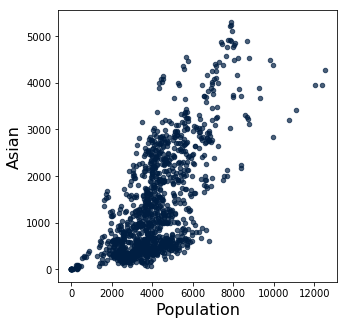

In [196]:
historical_data.scatter('Population', 'Asian')

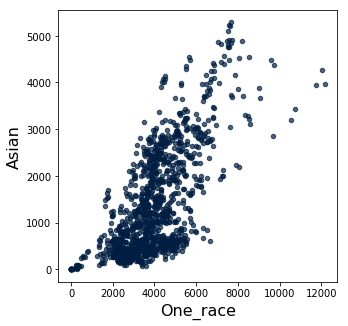

In [197]:
historical_data.scatter('One_race', 'Asian')

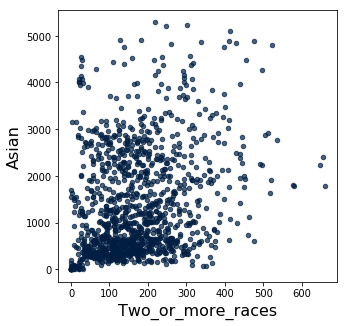

In [198]:
historical_data.scatter('Two_or_more_races', 'Asian')

To look at a 1-1 relationship over time we might prefer a simple line graph. We can first group the data by `Year`, then take the `mean` for the `Population`, and `plot` that against `Year`:

In [199]:
historical_data.to_df().groupby('Year')['Population'].mean()

Year
2010    4005.949239
2011    4050.675127
2012    4100.279188
2013    4149.751269
2014    4208.487310
2015    4267.832487
Name: Population, dtype: float64

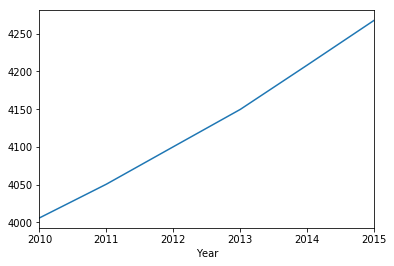

In [200]:
historical_data.to_df().groupby('Year')['Population'].mean().plot()

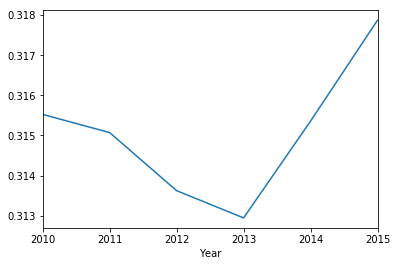

In [201]:
historical_data.to_df().groupby('Year')['Asian_percentage'].mean().plot()

## 2.3 2015

Let's look at only the year 2015:

In [202]:
historical_2015 = historical_data.where('Year', are.equal_to(2015))
historical_2015.show(5)

FIPS,Population,One_race,Two_or_more_races,Asian,Year,Asian_percentage
06075010100,3798,3517,281,1284,2015,0.338073
06075010200,4172,4014,158,401,2015,0.096117
06075010300,4387,4334,53,1700,2015,0.387509
06075010400,5148,4709,439,1429,2015,0.277584
06075010500,2589,2337,252,804,2015,0.310545


We can make a [choropleth map](https://en.wikipedia.org/wiki/Choropleth_map) with a little function, don't worry about the code below!

In [224]:
def choro_column(tab, column):
    sf_2010 = geojson.load(open("data/2010-sf.geojson"))
    threshold_scale = np.linspace(min(tab[column]), max(tab[column]), 6, dtype=float).tolist()

    mapa = folium.Map(location=(37.7793784, -122.4063879), zoom_start=11)
    mapa.choropleth(geo_data=sf_2010,
                    data=tab.to_df(),
                    columns=['FIPS', column],
                    fill_color='YlOrRd',
                    key_on='feature.properties.GEOID10',
                    threshold_scale=threshold_scale)
    
    mapa.save("output/map-{}.html".format(column.replace(" ", "-")))
    return mapa

Here's a choropleth of all the population:

In [225]:
choro_column(historical_2015, 'Population')
IFrame('output/map-Population.html', width=700, height=400)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


Let's look at only Asian:

In [226]:
choro_column(historical_2015, 'Asian')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


Try making one more choropleth below with only `Asian_percentage`:

<div class="alert alert-info">
Question: Where is the largest concentration of Asian residents?
</div>

## Challenge
<div class="alert alert-info">
Create a choropleth for 2010 with the same `Asian_percentage` column. Do you see any differences from 2010 to 2015?
</div>

_Replace this text with your response_

---

## 2.4 1940-2010

Now let's take a look at the historical data showing how the Asian population has changed over time, as compared to the black population.

First, let's load in all our of decennial San Francisco Chinatown census data acquired from an online domain called Social Explorer. Let's first examine this dataset to get a sense of what's in it.  

<div class="alert alert-info">
Question: Can you explain how you would derive the Asian population from the given census data?
</div>

_Replace this text with your response_

In [206]:
historical = Table.read_table('data/process.csv')
historical.show(5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Asian,Asian and Pacific Islander,Black,Federal Information Processing System Code,Total Population,White,Year
nan,nan,78,06075A0005000,3465,3199,1940
nan,nan,32,06075A0006000,4401,3203,1940
nan,nan,71,06075A0007000,5466,4489,1940
nan,nan,6,06075A0008000,5152,5124,1940
nan,nan,49,06075A0009000,5052,4959,1940


In [207]:
historical['Other'] = historical['Total Population'] - historical['White'] - historical['Black']
historical.show(5)

Asian,Asian and Pacific Islander,Black,Federal Information Processing System Code,Total Population,White,Year,Other
nan,nan,78,06075A0005000,3465,3199,1940,188
nan,nan,32,06075A0006000,4401,3203,1940,1166
nan,nan,71,06075A0007000,5466,4489,1940,906
nan,nan,6,06075A0008000,5152,5124,1940,22
nan,nan,49,06075A0009000,5052,4959,1940,44


You can use the mean function to find the average total population in Chinatown.  Do you notice any significant changes between 1940 and 2010?

In [208]:
historical.to_df().groupby('Year')['Total Population'].mean()

Year
1940    4521.900
1950    4592.400
1960    4123.400
1970    4137.000
1980    3841.100
1990    4007.300
2000    3886.300
2010    4478.125
Name: Total Population, dtype: float64

Let's plot the results on a graph.

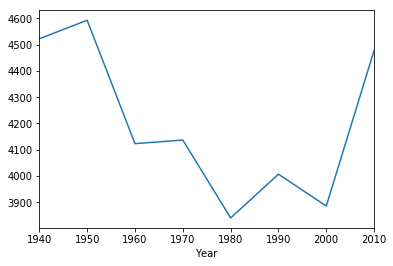

In [209]:
historical.to_df().groupby('Year')['Total Population'].mean().plot()

In [210]:
historical.to_df().groupby('Year')['White'].mean()

Year
1940    2880.50
1950    2469.40
1960    1702.10
1970    1341.80
1980    1170.30
1990    1195.60
2000    1322.10
2010    1679.25
Name: White, dtype: float64

We can plot the average population of different racial groups.

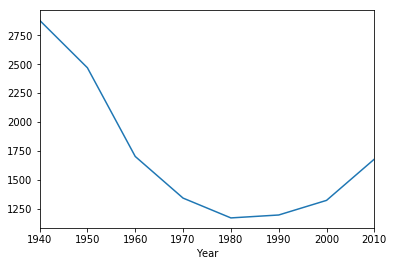

In [211]:
historical.to_df().groupby('Year')['White'].mean().plot()

In [212]:
historical.to_df().groupby('Year')['Black'].mean()

Year
1940    37.2
1950    84.3
1960    39.0
1970    33.3
1980    41.9
1990    52.0
2000    50.7
2010    71.5
Name: Black, dtype: float64

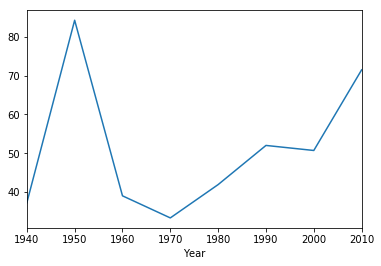

In [213]:
historical.to_df().groupby('Year')['Black'].mean().plot()

In [214]:
historical.to_df().groupby('Year')['Other'].mean()

Year
1940    1604.200
1950    2038.700
1960    2382.300
1970    2761.900
1980    2628.900
1990    2759.700
2000    2513.500
2010    2727.375
Name: Other, dtype: float64

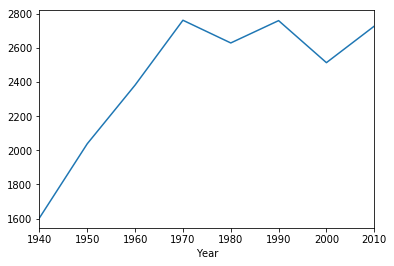

In [215]:
historical.to_df().groupby('Year')['Other'].mean().plot()

<div class="alert alert-info">
Question: Describe the population trends you observed from the above graphs. How would you compare the changes in Asian vs Black vs White populations?
</div>

_Replace this text with your response_

## 2.5 Manhattan
One of the goals of this module is to compare different Chinatowns from across the US. We will now compare the SF Chinatown data to the census data from Manhattan's Chinatown.  Let's load the Manhattan data.

In [216]:
manhattan = Table.read_table('data/manhattan_cleaned.csv')
manhattan.show(10)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/datascience/tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Year,Census Tract,Total Population,Asian/Other Population,Chinese Population,White Population
1950,29,6695,3180,3180,6228
1960,29,7091,4677,4677,2390
1970,6,8322,2684,2684,4669
1970,8,9597,4258,4258,5311
1970,16,6381,4069,4069,2141
1970,18,7764,2281,2281,4766
1970,27,1671,623,623,993
1970,29,9435,5996,5996,2321
1970,41,9294,5262,5262,3845
1980,6,10638,5172,5086,2179


In [217]:
manhattan.to_df().corr()

,Year,Census Tract,Total Population,Asian/Other Population,Chinese Population,White Population
Year,1.000000,0.054710,-0.191828,-0.087767,-0.118715,-0.539567
Census Tract,0.054710,1.000000,-0.412661,-0.376237,-0.378750,-0.014695
Total Population,-0.191828,-0.412661,1.000000,0.907103,0.904009,0.408393
Asian/Other Population,-0.087767,-0.376237,0.907103,1.000000,0.998946,0.119564
Chinese Population,-0.118715,-0.378750,0.904009,0.998946,1.000000,0.123380
White Population,-0.539567,-0.014695,0.408393,0.119564,0.123380,1.000000


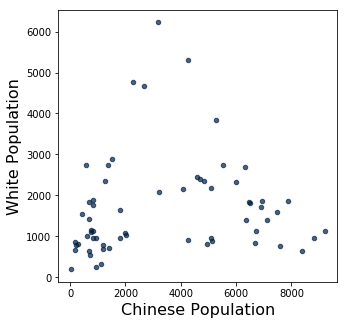

In [218]:
manhattan.scatter('Chinese Population', 'White Population')

In [219]:
manhattan_2010 = manhattan.where('Year', are.equal_to(2010))
manhattan_2010.show()

Year,Census Tract,Total Population,Asian/Other Population,Chinese Population,White Population
2010,2.01,3058,1266,1202,777
2010,6,11367,7253,6886,1708
2010,8,10290,9069,8832,964
2010,14.02,2782,880,760,1142
2010,16,8478,7058,6733,1117
2010,18,8660,5281,4827,2338
2010,22.01,6398,1553,1267,2349
2010,25,4869,1919,1818,965
2010,27,1264,978,941,254
2010,29,6398,4461,4260,917


In [227]:
def choro_column(tab, column):
    tab = tab.to_df()
    tab['Census Tract'] = tab['Census Tract'].astype(str).str.strip('0').str.strip('.')
    nyc_2010 = geojson.load(open("data/nyc-census-2010.geojson"))
    tracts = folium.features.GeoJson(nyc_2010)
    threshold_scale = np.linspace(min(tab[column]), max(tab[column]), 6, dtype=float).tolist()

    mapa = folium.Map(location=(40.7128, -74.00609), zoom_start=11)
    mapa.choropleth(geo_data=nyc_2010,
                    data=tab,
                    columns=['Census Tract', column],
                    fill_color='YlOrRd',
                    key_on='feature.properties.CTLabel',
                    threshold_scale=threshold_scale)
    mapa.save("output/map-{}.html".format(column.replace(" ", "-")))
    return mapa

In [229]:
choro_column(manhattan_2010, 'Chinese Population')
IFrame('output/map-Chinese-Population.html', width=700, height=400)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [230]:
manhattan_2010['Asian_percentage'] = manhattan_2010['Asian/Other Population'] / manhattan_2010['Total Population']
manhattan_2010.show(5)

Year,Census Tract,Total Population,Asian/Other Population,Chinese Population,White Population,Asian_percentage
2010,2.01,3058,1266,1202,777,0.413996
2010,6,11367,7253,6886,1708,0.638075
2010,8,10290,9069,8832,964,0.881341
2010,14.02,2782,880,760,1142,0.316319
2010,16,8478,7058,6733,1117,0.832508


In [232]:
choro_column(manhattan_2010, 'Asian_percentage')
IFrame('output/map-Asian_percentage.html', width=700, height=400)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# 3. Reading Primary Texts


In this class, we have been learning how to 'close-read' primary texts. Close-reading generally involves picking select passages and reading for the latent meanings embedded in word choice, syntax, the use of metaphors and symbols, etc. Here, we are introducing another way of analyzing primary texts using computational methods. Computational text analysis generally involves 'counting' words. Let's see how this works by analyzing some of the poems written by Chinese immigrants on Angel Island.

Run the following cell to import the poems from a .txt file.

In [233]:
with open('data/islandpoetry1_22.txt', "r") as f:
    raw = f.read()
print(raw)

The sea-scape resembles lichen twisting and
turning for a thousand li
There is no shore to land and it is difficult to
walk.
With a gentle breeze I arrived at the city
thinking all would be so.
At ease, how was one to know he was to live in a
wooden building?

Because my house had bare walls, I began
rushing all about.
The waves are happy, laughing "Ha-ha!"
When I arrived on Island, I heard I was
forbidden to land.
I could do nothing but frown and feel angry
at heaven.

As a rule, a person is twenty before he starts
making a living.
Family circumstances have forced me to
experience wind and dust.
The heartless months and years seem bent on
defeating me.
It is a pity that time quickly ages one.

The gold and silver of America is very
appealing.
Jabbing an awl into the thigh in search of
glory,
I embarked on the journey.
Not only are my one-thousand pieces of gold
already depleted, but
My countenance is blackened. It is surely for
the sake of the family.

Four days before the Qiqiao Fest

We're interested in which words appear the most often in our set of poems. It's pretty hard to read or see much in this form. We'll coming back to the topic of what words are the most common with actual numbers a bit later but for now, run the following cell to generate two interesting visualizations of the most common words (minus those such as "the", "a", etc.). 

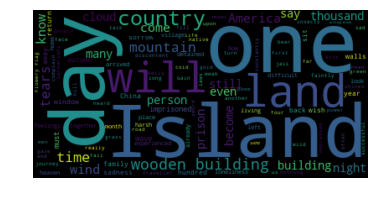

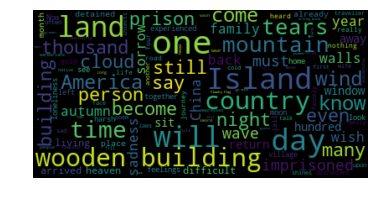

In [234]:
wordcloud = WordCloud().generate(raw)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(raw)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<div class="alert alert-info">
Question: What are the most common words you notice? Judging from these words, what do you think these poems are about?
</div>

_Replace this text with your response_

Oops, it seems we've forgotten just how many poems we have in our set. Luckily we have a quick way of finding out! Each "\n" in the display of the poem text indicates a line break. It turns out that each poem is separated by an empty line, a.k.a. two line breaks or "\n"'s.

In [235]:
num_poems = len(raw.split("\n\n"))
num_poems

49

We can also use this idea to calculate the number of characters in each poem.

In [236]:
num_char_per_poem = [len(p) for p in raw.split("\n\n")]
print(num_char_per_poem)

[259, 212, 227, 262, 306, 233, 654, 260, 488, 550, 206, 167, 331, 325, 128, 203, 196, 251, 221, 250, 488, 201, 206, 237, 344, 243, 442, 345, 507, 474, 382, 465, 624, 444, 302, 399, 230, 505, 268, 437, 288, 226, 532, 116, 487, 254, 279, 263, 233]


This is interesting but seems like just a long list of numbers. What about the average number of characters per poem?

In [237]:
np.mean(num_char_per_poem)

325.51020408163265

Let's look at it in histogram form to get a better idea of our data.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


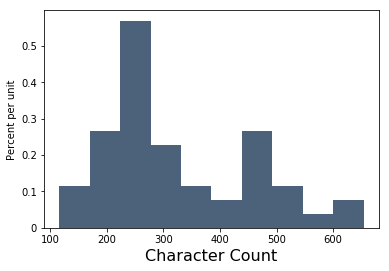

In [238]:
Table().with_columns("Character Count", np.asarray(num_char_per_poem)).hist()

Each bar of this histogram tells us what proportion of the poems (the height of the bar) have that many characters (the position of the bar on the x-axis).

We can also use "\n" to look at [enjambment](https://en.wikipedia.org/wiki/Enjambment) too. Let's calculate the proportion of lines that are enjambed out of the total number of lines per poem. 

In [239]:
from string import punctuation

poems = raw.split("\n\n")

all_poems_enjambment = []
for p in poems:
    lines = p.split("\n")
    poems = raw.split("\n\n")
    enjambment = 0
    for l in lines:
        try:
            if l[-1] in punctuation:
                pass
            else:
                enjambment += 1
        except:
            pass
    enj = enjambment/len(lines)
    all_poems_enjambment.append(enj)

print(all_poems_enjambment)

[0.625, 0.42857142857142855, 0.42857142857142855, 0.5555555555555556, 0.1111111111111111, 0.5, 0.45, 0.5, 0.4666666666666667, 0.4375, 0.42857142857142855, 0.2, 0.25, 0.2222222222222222, 0.0, 0.3333333333333333, 0.3333333333333333, 0.5, 0.3333333333333333, 0.2857142857142857, 0.4, 0.42857142857142855, 0.42857142857142855, 0.5, 0.2, 0.4444444444444444, 0.42857142857142855, 0.2727272727272727, 0.5, 0.35714285714285715, 0.3333333333333333, 0.5, 0.3157894736842105, 0.35714285714285715, 0.5, 0.5384615384615384, 0.5, 0.5, 0.375, 0.4666666666666667, 0.5555555555555556, 0.5, 0.47058823529411764, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4444444444444444]


Once again, what about the average?

In [240]:
np.mean(all_poems_enjambment)

0.41237745084889205

Let's now return to the question of the words that appear the most frequently in these 49 poems. First we have to use spaCy, an open-source software library for Natural Language Processing (NLP), to parse through the text and replace all the "\n"'s with spaces.

In [241]:
nlp = spacy.load('en', parser=False)
parsed_text = nlp(raw.replace("\n", " "))

We can separate all the words/symbols and put them in a table.

In [245]:
toks_tab = Table()
toks_tab.append_column(label="Word", values=[word.text for word in parsed_text])
toks_tab

Word
The
sea
-
scape
resembles
lichen
twisting
and
turning
for


In [246]:
toks_tab.append_column(label="POS", values=[word.pos_ for word in parsed_text])
toks_tab

Word,POS
The,DET
sea,NOUN
-,PUNCT
scape,NOUN
resembles,NOUN
lichen,ADJ
twisting,VERB
and,CCONJ
turning,VERB
for,ADP


Now let's create a new table with even more columns using the "tablefy" function below.

In [247]:
def tablefy(parsed_text):
    toks_tab = Table()
    toks_tab.append_column(label="Word", values=[word.text for word in parsed_text])
    toks_tab.append_column(label="POS", values=[word.pos_ for word in parsed_text])
    toks_tab.append_column(label="Lemma", values=[word.lemma_ for word in parsed_text])
    toks_tab.append_column(label="Stop Word", values=[word.is_stop for word in parsed_text])
    toks_tab.append_column(label="Punctuation", values=[word.is_punct for word in parsed_text])
    toks_tab.append_column(label="Space", values=[word.is_space for word in parsed_text])
    toks_tab.append_column(label="Number", values=[word.like_num for word in parsed_text])
    toks_tab.append_column(label="OOV", values=[word.is_oov for word in parsed_text])
    toks_tab.append_column(label="Dependency", values=[word.dep_ for word in parsed_text])
    return toks_tab

In [249]:
tablefy(parsed_text)

Word,POS,Lemma,Stop Word,Punctuation,Space,Number,OOV,Dependency
The,DET,the,True,False,False,False,True,det
sea,NOUN,sea,False,False,False,False,True,compound
-,PUNCT,-,False,True,False,False,True,punct
scape,NOUN,scape,False,False,False,False,True,nsubj
resembles,NOUN,resemble,False,False,False,False,True,ROOT
lichen,ADJ,lichen,False,False,False,False,True,compound
twisting,VERB,twist,False,False,False,False,True,dobj
and,CCONJ,and,True,False,False,False,True,cc
turning,VERB,turn,False,False,False,False,True,conj
for,ADP,for,True,False,False,False,True,prep


Next, let's look at the frequency of words. However, we want to get rid of words such as "the" and "and" (stop words), punctuation, and spaces. We can do this by selecting rows that are not stop words, punctuation, or spaces and then sorting by word!

In [250]:
word_counts = tablefy(parsed_text).where("Stop Word", are.equal_to(False)).where(
    "Punctuation", are.equal_to(False)).where(
    "Space", are.equal_to(False)).group("Word").sort("count",descending=True)
word_counts

Word,count
building,15
land,12
wooden,11
Island,11
day,10
country,10
tears,8
know,7
America,7
wind,6


In this table, we have both the words "sad" and "sadness" - it seems strange to separate them. It turns out that these words are part of the same "lexeme", or a unit of meaning. For example, "run", "runs", "ran", and "running" are all part of the same lexeme with the lemma 'run'. Lemmas are another column in our table from above! Nice!

In [251]:
lemma_counts = tablefy(parsed_text).where("Stop Word", are.equal_to(False)).where(
    "Punctuation", are.equal_to(False)).where(
    "Space", are.equal_to(False)).group("Lemma").sort("count",descending=True)
lemma_counts

Lemma,count
building,16
day,15
land,13
wooden,11
country,10
Island,10
come,9
time,8
tear,8
know,8


Now let's look at how many words there are of each part of speech.

In [252]:
pos_counts = tablefy(parsed_text).where("Stop Word", are.equal_to(False)).where(
    "Punctuation", are.equal_to(False)).where(
    "Space", are.equal_to(False)).group("POS").sort("count",descending=True)
pos_counts

POS,count
NOUN,585
VERB,392
ADJ,173
PROPN,85
ADV,65
ADP,12
NUM,8
INTJ,1


We can also look at the proportions of each POS out of all the words!

In [253]:
for i in np.arange(pos_counts.num_rows):
    pos = pos_counts.column("POS").item(i)
    count = pos_counts.column("count").item(i)
    total = np.sum(pos_counts.column("count"))
    proportion = str(count / total)
    print(pos + " proportion: " + proportion)

NOUN proportion: 0.4428463285389856
VERB proportion: 0.2967448902346707
ADJ proportion: 0.13096139288417866
PROPN proportion: 0.0643451930355791
ADV proportion: 0.04920514761544285
ADP proportion: 0.009084027252081756
NUM proportion: 0.006056018168054504
INTJ proportion: 0.000757002271006813


If we're interested in words' relations with each other, we can look at words that are next to each other. The function below returns the word following the first instance of the word you search for in the specified source.

In [254]:
def nextword(word, source):
    for i, w in enumerate(source):
        if w == word:
            return source[i+1]

Mess around a bit with this function! Change the "word" argument.

In [255]:
split_txt = raw.split()

# Change the target or "home" to other words!
nextword("home", split_txt)

'elicits'

We are specifically interested in the word "I" and the words that poets use in succession. Let's make an array of all the words that come after it in these poems. For easier viewing, the phrases have been printed out. What do you notice?

In [256]:
one_after_i = make_array()
for i, w in enumerate(split_txt):
    if w == "I":
        one_after_i = np.append(one_after_i, split_txt[i+1])
for i in one_after_i:
    print("I " + i)

I arrived
I began
I arrived
I heard
I was
I could
I embarked
I boarded
I am
I have
I suffered
I am
I sigh
I had
I took
I ate
I arrived
I thought
I could
I to
I would
I only
I can
I willingly
I intended
I have
I used
I immediately
I have
I am
I look
I wish
I just
I had
I think
I had
I resolved
I am
I heard,
I composed
I lie
I get
I count
I have
I feel
I sought
I see
I can
I gaze
I listen
I dissipate
I met
I cannot
I sit
I have
I wish
I could
I confide
I rely
I bow
I can
I can
I cannot
I can
I have
I cannot
I threw
I have
I constantly
I dreamed
I have
I am
I will
I cannot
I be
I please?
I am
I must
I must
I bear
I look
I am
I gaze
I sit
I can
I return
I came
I will
I will
I am
I threw
I bought
I opened
I reminisce
I have
I lean
I am
I grieve
I say?
I have
I am
I dare
I left
I gaze
I would
I beat
I think
I respectfully
I am
I become
I will
I level
I am
I should
I thoroughly
I cannot
I also


Above we have only shown the next word, what about the next two words? Does this give you any new insight?

In [257]:
two_after_i = make_array()
for i, w in enumerate(split_txt):
    if w == "I":
        two_after_i = np.append(two_after_i, split_txt[i+1] + " " + split_txt[i+2])
for i in two_after_i:
    print("I " + i)

I arrived at
I began rushing
I arrived on
I heard I
I was forbidden
I could do
I embarked on
I boarded the
I am at
I have yet
I suffered misery
I am not
I sigh because
I had intended
I took passage
I ate wind
I arrived safely
I thought I
I could land
I to know
I would become
I only wish
I can land
I willingly became
I intended to
I have not
I used to
I immediately raised
I have experienced
I am subject
I look up
I wish to
I just write
I had a
I think back
I had not
I resolved to
I am still
I heard, faintly,
I composed a
I lie stiff
I get up
I count the
I have not
I feel embarrassed.
I sought the
I see my
I can only
I gaze at
I listen to
I dissipate my
I met with
I cannot bear
I sit passively
I have a
I wish I
I could travel
I confide my
I rely solely
I bow my
I can do.
I can do
I cannot extend
I can only
I have infinite
I cannot fly
I threw away
I have no
I constantly pace
I dreamed of
I have run
I am allowed
I will toss
I cannot come
I be allowed
I please? There
I am rid
I must rememb

Try doing some exploring of your own! If you're feeling stuck, feel free to copy and edit code from above.

In [258]:
# Write your own code here!

### Sentiment Analysis

We can do some analysis of the overall sentiments, or emotions conveyed, in each of the poems using the code below. Here, we analyze the overall sentiment of each poem individually. Once you run the next cell, you'll see the sentiment values for each poem. A value below 0 denotes a negative sentiment, and a value above 0 is positive.

In [259]:
sentiments = make_array()
for p in poems:
    poem = TextBlob(p)
    sentiments = np.append(sentiments, poem.sentiment.polarity)
sentiments

array([-0.04090909,  0.18333333, -0.02222222,  0.38333333,  0.175     ,
        0.        ,  0.09791667,  0.12878788, -0.02380952,  0.15104167,
       -0.19166667,  0.        , -0.46      , -0.08061224, -0.03333333,
        0.03333333, -0.03      , -0.28333333,  0.03333333,  0.        ,
       -0.195     , -0.6875    , -0.025     ,  0.        ,  0.16666667,
       -0.26      , -0.155     ,  0.38611111, -0.10083333, -0.03194444,
       -0.10833333, -0.07727273,  0.12777778, -0.134375  ,  0.15      ,
        0.08333333,  0.1375    , -0.12625   ,  0.075     , -0.05      ,
        0.29      ,  0.225     , -0.05138889,  0.        ,  0.00204082,
        0.265625  ,  0.0625    , -0.33333333, -0.025     ])

Now, what does this mean? It appears that the number of poems with negative sentiment is about the same as the number of poems with positive or neutral (0) sentiment. We can look at the proportion of negative poems in the next cell:

In [260]:
neg_proportion = np.count_nonzero(sentiments < 0)/len(sentiments)
neg_proportion

0.4897959183673469

Okay, so just under half of the poems have negative sentiment. So, on average the poems have slightly positive sentiment, right?

We can also perform sentiment analysis across the text of all of the poems at once and see what happens:

In [261]:
poems_all = TextBlob(raw.replace('\n', ' '))
poems_all.sentiment.polarity

-0.014875449409347723

This way of analyzing the text tells us that the language in all of the poems has slightly negative sentiment.

One more analysis we can perform is computing the average sentiment of the poems, given the list of each individual poem's sentiments that we computed earlier:

In [262]:
np.mean(sentiments)

-0.007540473981800516

This method also tells us that our poems have slightly negative sentiment, on average.

Here, let's look at one of the poems with it's sentiment value:

In [263]:
poem_3 = poems[3].replace('\n', ' ')
print(poem_3)
print(TextBlob(poem_3).sentiment.polarity)

The gold and silver of America is very appealing. Jabbing an awl into the thigh in search of glory, I embarked on the journey. Not only are my one-thousand pieces of gold already depleted, but My countenance is blackened. It is surely for the sake of the family.
0.3833333333333333


Let's look at one more poem:

In [264]:
poem_47 = poems[47].replace('\n', ' ')
print(poem_47)
print(TextBlob(poem_47).sentiment.polarity)

I thoroughly hate the barbarians because they do not respect justice. They continually promulgate harsh laws to show off their prowess. They oppress the overseas Chinese and also violate treaties. They examine for hookworms and practice hundreds of despotic acts.
-0.3333333333333333


<div class="alert alert-info">
Question: Do you think the sentiment analyzer did a good job assigning the sentiment to these poems? What might that mean for the trends we see in our average sentiment across the poems?
</div>

_Replace this text with your response_

<!-- 

---

***Please fill out our [feedback form](https://goo.gl/forms/Ir0Ulg5WDQogHhK72)!***

-->